In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# os libraries
from pathlib import Path
import pickle
import os, glob

# Required Libraries

# Base Python Libraries
import json
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from collections import OrderedDict, Counter
import string
from ast import literal_eval

# Datetime utilities
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar

#Visualizations
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import matplotlib.dates as mdates

#Natural Language Processing (NLP)

import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from joblib import Parallel, delayed
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [ ]:
senwave_japan = pd.read_csv("/content/drive/MyDrive/datasets_IJB/Tweets_Japan.csv",error_bad_lines=False, engine="python")
print("Length of Senwave Japan Dataset = {}".format(len(senwave_japan)))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Length of Senwave Japan Dataset = 644510


In [ ]:
senwave_japan

,Unnamed: 0,created_at,id,text,user_location
0,385,Wed Dec 08 04:26:11 +0000 2021,1468436724007194629,RT @WelshGovernment: We've disrupted the trans...,"Connah's Quay, North Wales"
1,616,Wed Dec 08 04:26:29 +0000 2021,1468436797877526533,RT @koreatimescokr: South Korea's top economic...,"Taipei City, Taiwan"
2,737,Wed Dec 08 04:26:43 +0000 2021,1468436858140958721,RT @htTweets: India surpassed Brazil in food e...,China occupied ( Islamabad )
3,1631,Wed Dec 08 04:27:59 +0000 2021,1468437175079686146,RT @DrSalinasLab: Check our latest work on #na...,"Taichung City, Taiwan"
4,2059,Wed Dec 08 04:28:23 +0000 2021,1468437276694880256,RT @tomilo: Labour’s First Minister of Wales M...,"Beijing, People's Republic of China"
...,...,...,...,...,...
644505,99475,Fri Aug 21 19:19:10 +0000 2020,1296889599063621632,RT @primediscussion: Ship sailed bro. That was...,MY WORLD NOT YOURS #GETYOLIFE
644506,50389,Fri Aug 21 19:45:52 +0000 2020,1296896319051702272,RT @froggysmail: dynamite dropping in the midd...,🔜名古屋 ｜ JPN✖︎ENG OK👍
644507,10749,Fri Aug 21 20:18:40 +0000 2020,1296904573211164672,RT @TristanGrunow: Many thanks to Dr. @sonjape...,TYO/JPN
644508,4300,Fri Aug 21 22:04:24 +0000 2020,1296931183142383617,"RT @DrTedros: Thank you, #BTS for the upliftin...","ENG speaker, learning KOR/JPN"


In [ ]:
senwave_japan.drop(senwave_japan.columns[0], axis=1)

,created_at,id,text,user_location
0,Wed Dec 08 04:26:11 +0000 2021,1468436724007194629,RT @WelshGovernment: We've disrupted the trans...,"Connah's Quay, North Wales"
1,Wed Dec 08 04:26:29 +0000 2021,1468436797877526533,RT @koreatimescokr: South Korea's top economic...,"Taipei City, Taiwan"
2,Wed Dec 08 04:26:43 +0000 2021,1468436858140958721,RT @htTweets: India surpassed Brazil in food e...,China occupied ( Islamabad )
3,Wed Dec 08 04:27:59 +0000 2021,1468437175079686146,RT @DrSalinasLab: Check our latest work on #na...,"Taichung City, Taiwan"
4,Wed Dec 08 04:28:23 +0000 2021,1468437276694880256,RT @tomilo: Labour’s First Minister of Wales M...,"Beijing, People's Republic of China"
...,...,...,...,...
644505,Fri Aug 21 19:19:10 +0000 2020,1296889599063621632,RT @primediscussion: Ship sailed bro. That was...,MY WORLD NOT YOURS #GETYOLIFE
644506,Fri Aug 21 19:45:52 +0000 2020,1296896319051702272,RT @froggysmail: dynamite dropping in the midd...,🔜名古屋 ｜ JPN✖︎ENG OK👍
644507,Fri Aug 21 20:18:40 +0000 2020,1296904573211164672,RT @TristanGrunow: Many thanks to Dr. @sonjape...,TYO/JPN
644508,Fri Aug 21 22:04:24 +0000 2020,1296931183142383617,"RT @DrTedros: Thank you, #BTS for the upliftin...","ENG speaker, learning KOR/JPN"


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim
!pip install sentence_transformers
from gensim.models import CoherenceModel
from pprint import pprint
from gensim import corpora
nltk.download('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 5.5 MB 15.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.9 MB/s 
     |████████████████████████████████| 163 kB 72.9 MB/s 
     |████████████████████████████████| 7.6 MB 62.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8f6cfbbe4b61f564d81be0bf7ec25464050bb445abb93c87930bbbc3491d7082
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [ ]:
words = clean(''.join(str(senwave_japan['text'].tolist())))

In [ ]:
words[:30]

['rt',
 'welshgovernment',
 'weve',
 'disrupted',
 'transmission',
 'covid19',
 'need',
 'keep',
 'right',
 'thing',
 'protect',
 'f',
 'rt',
 'koreatimescokr',
 'south',
 'korea',
 'top',
 'economic',
 'policymaker',
 'said',
 'wednesday',
 '2022',
 'economic',
 'policy',
 'focused',
 'supporting',
 'pandemich',
 'rt',
 'httweets',
 'india']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

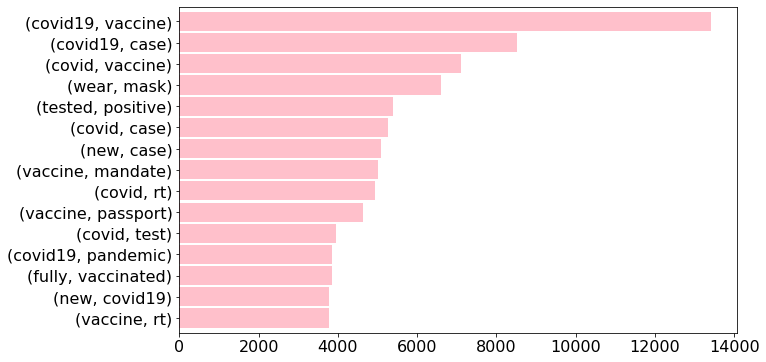

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'pink', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

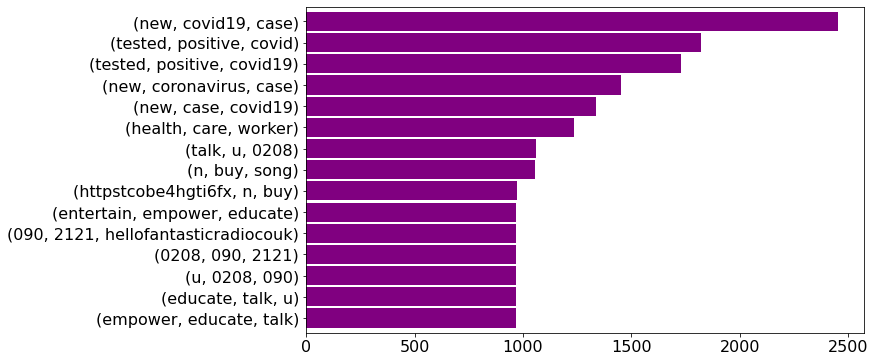

In [ ]:
trigrams_series.sort_values().plot.barh(color = 'purple', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [ ]:
contractions = {
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [ ]:
contractionsWithAnotherInvertedComma = {
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

In [ ]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions

    def lower(self, tweet):
        return tweet.lower()

    def abbreviate(self, tweet):
        tweet = tweet.split(' ')
        j = 0
        for str_ in tweet:
            fileName = '/content/drive/MyDrive/Senwave/Abbreviations.txt'
            accessMode = 'r'
            with open(fileName, accessMode) as csvfile:
                dataFromFile = csv.reader(csvfile, delimiter = '=')
                str_ = re.sub('[^a-zA-Z0-9-_.]', '', str_)
                for row in dataFromFile:
                    if str_.upper() == row[0]:
                        tweet[j] = row[1]
                csvfile.close()
            j += 1
        return ' '.join(tweet)

    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet

    def emoji2text(self, tweet):
        emojis = demoji.findall(tweet)
        new_tweet = []
        for word in tweet.split():
            if word in emojis.keys():
                tweet = tweet.replace(word, emojis[word])
                new_tweet.append(emojis[word])
            wordmojis = demoji.findall(word)
            for char in word:
                if char in wordmojis.keys():
                    tweet = tweet.replace(word, wordmojis[char])

        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)

    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)

    def preprocess_tweet(self, tweet):
        tweet = str(tweet).lower()
        tweet = self.abbreviate(tweet)
        tweet = self.expand(tweet)
        tweet = self.emoji2text(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        return tweet

In [ ]:
!pip install demoji
import demoji
pp_class = preprocess(senwave_japan, contractions, contractionsWithAnotherInvertedComma)
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : pp_class.preprocess_tweet(x))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.5 MB/s 


In [ ]:
class wordReplace():
  def bruteGen(tweet):
    tweet = tweet.replace("indiavscorona", "india versus coronavirus")
    tweet = tweet.replace("outbreakindia", "outbreak india")
    tweet = tweet.replace("real”", "real")
    tweet = tweet.replace("mutra", "urine")
    tweet = tweet.replace("fakenews", "fake news")
    tweet = tweet.replace("“omg", "oh my god")
    tweet = tweet.replace("“damn", "damn")
    tweet = tweet.replace("god’s", "gods")
    tweet = tweet.replace("lockdownextension", "lockdown extension")
    tweet = tweet.replace("कोरोना", "coronavirus")
    tweet = tweet.replace("indiathanks", "india thanks")
    tweet = tweet.replace("coronacoronavirus", "coronavirus")
    tweet = tweet.replace('coronavirusinsa', "coronavirus in south africa")
    tweet = tweet.replace('coronaviruscanada', 'coronavirus canada')
    tweet = tweet.replace('coronavirusau', 'coronavirus australia')
    tweet = tweet.replace('coronavirusaus', 'coronavirus australia')
    tweet = tweet.replace('cuomoprimetime', 'new york governor prime time')
    tweet = tweet.replace('letsfightcoronavirus', 'let us fight coronavirus')
    tweet = tweet.replace("covid19", "coronavirus")
    tweet = tweet.replace("covid", "coronavirus")
    tweet = tweet.replace("aprilfoolsday", "april fools day")
    tweet = tweet.replace("covidー19", "coronavirus")
    tweet = tweet.replace("stayathome", "stay at home")
    tweet = tweet.replace("“april", "april")
    tweet = tweet.replace("“i", "i")
    tweet = tweet.replace("aprilfools", "april fools")
    tweet = tweet.replace("coronavirusoutbreak", "coronavirus outbreak")
    tweet = tweet.replace("virusー19", "coronavirus")
    tweet = tweet.replace("fool’s", "fools")
    tweet = tweet.replace("what’s", "what is")
    tweet = tweet.replace("coronavirus”", "coronavirus")
    tweet = tweet.replace("fools”", "fools")
    tweet = tweet.replace("stayhome", "stay home")
    tweet = tweet.replace("quarantinelife", "quarantine life")
    tweet = tweet.replace("tablighijamaat", "muslims")
    tweet = tweet.replace("corona”", "coronavirus")
    tweet = tweet.replace("fauci", "physician")
    tweet = tweet.replace("april’s", "april")
    tweet = tweet.replace("pmkcallscurfewextension", "prime minister calls for curfew extension")
    tweet = tweet.replace("“virus", "coronavirus")
    tweet = tweet.replace("virus”", "coronavirus")
    tweet = tweet.replace("“corona", "coronavirus")
    tweet = tweet.replace("coronavirustruth", "coronavirus truth")
    tweet = tweet.replace("socialdistancing", "social distancing")
    tweet = tweet.replace("homestaysafe", "home stay safe")
    tweet = tweet.replace("“coronavirus", "coronavirus")
    tweet = tweet.replace("coronavirusupdate", "coronavirus update")
    tweet = tweet.replace("virusvirus", "coronavirus")
    tweet = tweet.replace("coronaviruspandemic", "coronavirus pandemic")
    tweet = tweet.replace("thelockdown", "the lockdown")
    tweet = tweet.replace("nizamuddin", "delhi")
    tweet = tweet.replace("trump’s", "donald trump")
    tweet = tweet.replace("“the", "the")
    tweet = tweet.replace("virus2019", "coronavirus")
    tweet = tweet.replace("indiafightscorona", "india fights coronavirus")
    tweet = tweet.replace("homesavelives", "home save lives")
    tweet = tweet.replace("everyone’s", "everyone")
    tweet = tweet.replace("coronariskforprisoners", "coronavirus risk for prisoners")
    tweet = tweet.replace("coronavirususa", "coronavirus usa")
    tweet = tweet.replace("tablighi", "mosque")
    tweet = tweet.replace("delhimarkaz", "delhi mosque")
    tweet = tweet.replace("coronajihad", "coronavirus struggle")
    tweet = tweet.replace("coronajihaad", "coronavirus struggle")
    tweet = tweet.replace("aprilfool", "april fool")
    tweet = tweet.replace("trumppressconference", "trump press conference")
    tweet = tweet.replace("i’m", "i am")
    tweet = tweet.replace("tigerking", "tiger king")
    tweet = tweet.replace("it’s", "it is")
    tweet = tweet.replace("trumpvirus", "trump virus")
    tweet = tweet.replace("today’s", "today is")
    tweet = tweet.replace("“you", "you")
    tweet = tweet.replace("“a", "a")
    tweet = tweet.replace("fools’", "fools")
    tweet = tweet.replace("rtgnews", "news")
    tweet = tweet.replace("19india", "india")
    tweet = tweet.replace("coronavirusindia", "coronavirus india")
    tweet = tweet.replace("y’all", "you all")
    tweet = tweet.replace("मीडिया", "media")
    tweet = tweet.replace("here’s", "here is")
    tweet = tweet.replace("“we", "we")
    tweet = tweet.replace("“fuck", "fuck")
    tweet = tweet.replace("flattenthecurve", "flatten the curve")
    tweet = tweet.replace("jammuandkashmir", "jammu and kashmir")
    tweet = tweet.replace("chriscuomo", "new york governor")
    tweet = tweet.replace("‘april", "april")
    tweet = tweet.replace("dranbumani", "doctor")
    tweet = tweet.replace("tndemandsmasstesting", "tamil nadu demands mass testing")
    tweet = tweet.replace("tabligi", "muslims")
    tweet = tweet.replace("don’t", "do not")
    tweet = tweet.replace("वायरस", "virus")
    tweet = tweet.replace("letsfightvirus", "let us fight virus")
    return tweet
